# Connecting with the google drive
*Logging in to the msyed.bscs17seecs*

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# SETTING PATH TO ROOT
*Setting the path to Colab*

In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

# IMPORTING

importing tensorflow and keras



In [0]:
#installing the tensorflow 2.0
!pip install tensorflow==2.0.0-beta1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
import pandas as pd

     |████████████████████████████████| 87.9MB 25kB/s 
     |████████████████████████████████| 3.1MB 834kB/s 
     |████████████████████████████████| 501kB 634kB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

# Data
*1) Importing the data from the google colab*

*2) Creating an array of RTOs*

In [0]:
import csv
load = []
time_step = []

with open(root_path +'TCP_data/filtered1.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  i =0;
  for row in reader:
    load.append(float(row[6]))
    time_step.append(i)
    i += 1

# Observing the distribution

We are rendering a graph of RTO against time to observe the distribution of the data

We are plotting the data with matplot.pyplot

We are converting the list into an array with the help numpy library

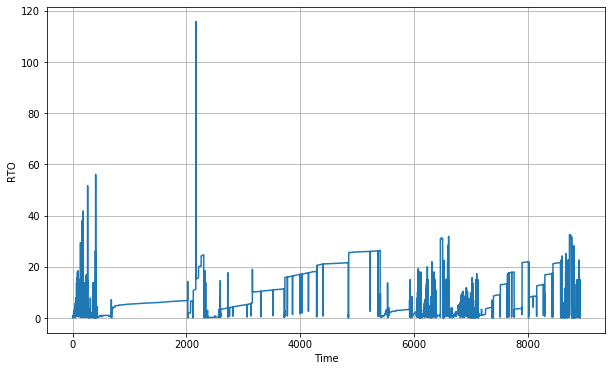

In [0]:
import numpy as np
import matplotlib.pyplot as plt


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("RTO")
    plt.grid(True)

series = np.array(load)
time = np.array(time_step)

plt.figure(figsize=(10, 6))
plot_series(time, series)

# DATA DIVISION
We seperate the data into two set with an approximately 9:1 ratio

1) Training set

2) Validation set

In [0]:
split_time = 8000
time_train = time[:split_time]
x_train = load[:split_time]
time_valid = time[split_time:]
x_valid = load[split_time:]

# Sequence generation

Generating sequeces of the data that is to be fed into the machine learning architecture

In [0]:
window_size = 4
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Defining AI architecture

Input layer

\\/ \\/ \\/ \\/

20 Dense Unit

\\/ \\/ \\/ \\/

10 Dense Unit

\\/ \\/ \\/ \\/

1 Dense Unit

\\/ \\/ \\/ \\/

Output layer


In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Selection loss function and Training

loss function = Mean Absolute Percentage Error

Optimizer = Adams

Training

In [0]:
model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=["mape"])
history = model.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
250/250 [==============================] - 3s 11ms/step - loss: 99676.7231 - mape: 99726.5000
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 78681.7379 - mape: 78720.8828
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 49314.6010 - mape: 49339.1094
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 29668.4088 - mape: 29683.1250
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 47636.0560 - mape: 47659.7305
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 36695.0958 - mape: 36713.3398
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 44200.8701 - mape: 44222.8359
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 43467.6939 - mape: 43489.2969
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 39719.7555 - mape: 39739.4961
Epoch 10/100
250/250 [==============================] 

# Forecasting

Using the trained model to predict the validation set

In [0]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

# Analyzing Predictions

Printing the loss function

Displaying the results on graph

1813.012


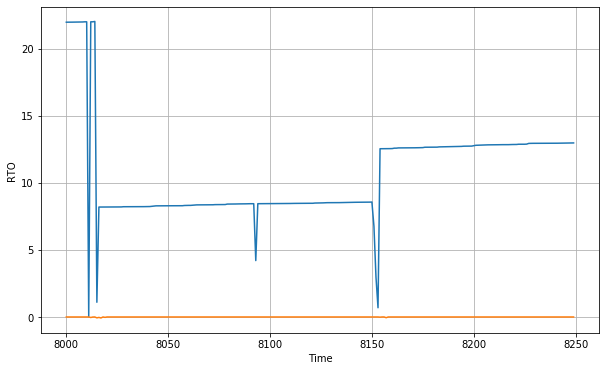

In [0]:
print(tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy())

plt.figure(figsize=(10, 6))

plot_series(time_valid[:250], x_valid[:250])
plot_series(time_valid[:250], results[:250])


# Analyzing Training History

plotting the graph of loss vs epochs

plotting the graph of MAPE vs epochs

<Figure size 432x288 with 0 Axes>

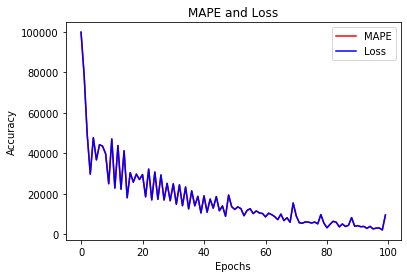

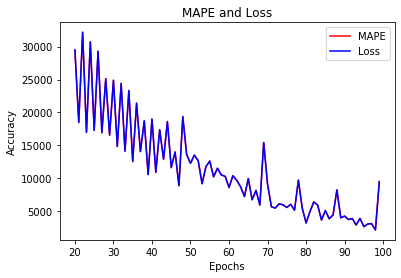

<Figure size 432x288 with 0 Axes>

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mape=history.history['mape']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAPE and Loss
#------------------------------------------------
plt.plot(epochs, mape, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

epochs_zoom = epochs[20:]
mae_zoom = mape[20:]
loss_zoom = loss[20:]

#------------------------------------------------
# Plot Zoomed MAPE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()